# week5 solutions
### Peilin Luo

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import math

### problem 1

In [25]:
def VaR_ES(data, alpha=0.05):
    data_sort = np.sort(data)
    n = alpha * data.size
    VaR = (data_sort[math.ceil(n)] + data_sort[math.floor(n)]) / 2
    ES = data_sort[:math.floor(n)].mean()
    return -VaR, -ES

In [26]:
df_p1 = pd.read_csv('problem1.csv')
n_sim = 10_000

#using normal distribution
mu_p1, std_p1 = sps.norm.fit(df_p1)
np.random.seed(22)
sim_norm = np.random.normal(loc=mu_p1, scale=std_p1, size=n_sim)
VaR_norm, ES_norm = VaR_ES(sim_norm)
print("fitted results-mu and std", mu_p1, std_p1)
print("VaR and ES", VaR_norm, ES_norm)

fitted results-mu and std -0.0008798294897083734 0.04886453171494587
VaR and ES 0.0819969284183214 0.10204677423492833


In [27]:
VaR_ES(df_p1)

(array([0.00957041]), 0.012063068087178523)

In [28]:
# using t distribution
free, mu_t, sigma_t = sps.t.fit(df_p1)
sim_t = sps.t.rvs(free, loc=mu_t, scale=sigma_t, size=n_sim)
VaR_t, ES_t = VaR_ES(sim_t)
print("fitted results-free, mu and sigma", free, mu_t, sigma_t)
print("VaR and ES", VaR_t, ES_t)

fitted results-free, mu and sigma 4.251095126060646 -9.372252668219527e-05 0.03643886329896129
VaR and ES 0.07635000800129081 0.11299642806106665


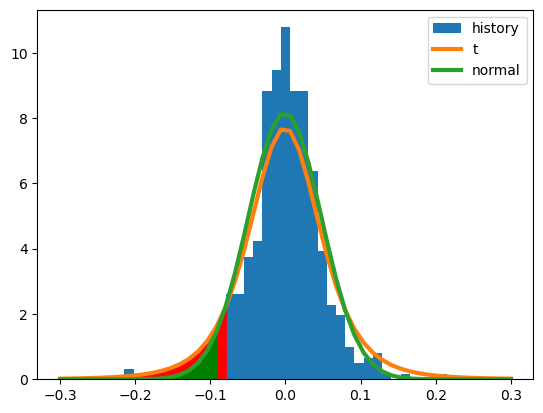

In [29]:
bins = np.linspace(-0.3, 0.3, 50)
plt.hist(df_p1, bins, density=True, label='history')
plt.plot(bins, sps.t.pdf(bins, free, loc=mu_p1, scale=std_p1), linewidth=3, label='t')
plt.fill_between(x=bins, y1=sps.t.pdf(bins, free, loc=mu_p1, scale=std_p1),
                 where=(bins < -VaR_t), color='red')
plt.plot(bins, sps.norm.pdf(bins, loc=mu_p1, scale=std_p1), linewidth=3, label='normal')
plt.fill_between(x=bins, y1=sps.norm.pdf(bins, loc=mu_p1, scale=std_p1),
                 where=(bins < -VaR_norm), color='green')
plt.legend(loc='upper right')
plt.show()

### problem 3

In [30]:
from riskill import risk

In [31]:
prices = pd.read_csv('DailyPrices.csv')
portfolio_df = pd.read_csv('portfolio.csv')
returns = risk.return_calculate(prices)

In [32]:
returns

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
Date,,,,,,,,,,,,,,,,,,,,,
2/15/2022 0:00,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2/16/2022 0:00,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
2/17/2022 0:00,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
2/18/2022 0:00,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
2/22/2022 0:00,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/3/2023 0:00,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
2/6/2023 0:00,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
2/7/2023 0:00,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618


In [33]:
portfolio_A = portfolio_df[portfolio_df['Portfolio'] == 'A']
A = dict(zip(portfolio_A['Stock'], portfolio_A['Holding']))
portfolio_B = portfolio_df[portfolio_df['Portfolio'] == 'B']
B = dict(zip(portfolio_B['Stock'], portfolio_B['Holding']))
portfolio_C = portfolio_df[portfolio_df['Portfolio'] == 'C']
C = dict(zip(portfolio_C['Stock'], portfolio_C['Holding']))
total = {}
for k in (set(A) | set(B) | set(C)):
    total[k] = A.get(k, 0) + B.get(k, 0) + C.get(k, 0)

In [34]:
def portfolio_VaR_ES_t(P):
    prices_P = prices[['Date'] + list(P.keys())]
    holdings = np.array(list(P.values()))
    current_value_P = holdings.T @ prices_P.iloc[-1, 1:]
    VaR = np.zeros(len(P))
    ES = np.zeros(len(P))
    for i, k in enumerate(P.keys()):
        VaR[i], ES[i] = risk.BySim().VaR_ES_t(returns[k])
    new_value_P = holdings.T @ ((-VaR + 1) * np.array(prices_P.iloc[-1, 1:]))
    expected_bad = holdings.T @ ((-ES + 1) * np.array(prices_P.iloc[-1, 1:]))
    return current_value_P - new_value_P, current_value_P - expected_bad

In [35]:
portfolio_VaR_ES_t(A)

(10647.727417554357, 14620.255458208383)

In [36]:
portfolio_VaR_ES_t(B)

(9506.084103857924, 13049.634599607263)

In [37]:
portfolio_VaR_ES_t(C)

(8121.235771854961, 11338.453738211683)

In [38]:
portfolio_VaR_ES_t(total)

(28231.898692175047, 39003.75355828123)